本脚本用于确认opencv的findContours的返回点点序

结果显示：**findContours以最左边的点为起点，并逆时针返回边缘点**

In [23]:
# read code tools
# share in https://gist.github.com/WuShaogui/19c690bde2a0fe70b061d50e20129531
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

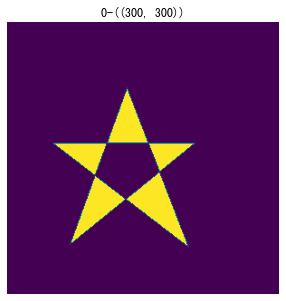

In [30]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import numpy as np
import cv2
import copy

# 由点生成模拟图片
side = 8
xy = [
        tuple([
          132.6923076923077,
          72.11538461538458
        ]),
        tuple([
          69.23076923076923,
          245.19230769230768
        ]),
        tuple([
          207.69230769230768,
          133.65384615384613
        ]),
        tuple([
          50.9230769230769229,
          133.65384615384613
        ]),
        tuple([
          200.03846153846155,
          248.07692307692304
        ])
    ]  
  
image = ImagePath.Path(xy).getbbox()  
size = list(map(int, map(math.ceil, (300,300))))
img = Image.new("RGB", size, "#000000") 
img1 = ImageDraw.Draw(img)
img1.polygon(xy, fill ="#eeeeff", outline ="blue") 

np_img = np.array(img, dtype=np.uint8)
np_img=cv2.cvtColor(np_img,cv2.COLOR_RGB2GRAY)
show_images([np_img])

In [27]:
# 使用findContours计算边缘点
contours,hierarchys = cv2.findContours(np_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #原始mask，检测轮廓及层次关系
print(len(contours),len(contours[0]))

# 此处返回两组点，确认第一组点是外圈
for i,contour in enumerate(contours):
    contour=np.array(contour)
    print(i,contour.shape)
    contour=contour.reshape((-1,contour.shape[1],contour.shape[-1])) #去掉矩阵中间维度1
    contour=cv2.approxPolyDP(contour,2,True) #使用opencv求得近似多边形的点集合
    contour=np.reshape(contour,(contour.shape[0],contour.shape[2]))
    print(contour)
    print('---------------------------')

2 310
0 (310, 1, 2)
[[ 50 133]
 [ 97 169]
 [ 69 245]
 [131 195]
 [200 248]
 [168 165]
 [207 133]
 [156 133]
 [132  72]
 [109 133]]
---------------------------
1 (82, 1, 2)
[[ 97 169]
 [110 133]
 [155 133]
 [168 164]
 [131 195]]
---------------------------


In [28]:
# 取第一组点
contour=np.array(contours[0])
contour=contour.reshape((-1,contour.shape[1],contour.shape[-1])) #去掉矩阵中间维度1
contour=cv2.approxPolyDP(contour,2,True) #使用opencv求得近似多边形的点集合
approx_contours=np.reshape(contour,(contour.shape[0],contour.shape[2]))

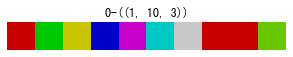

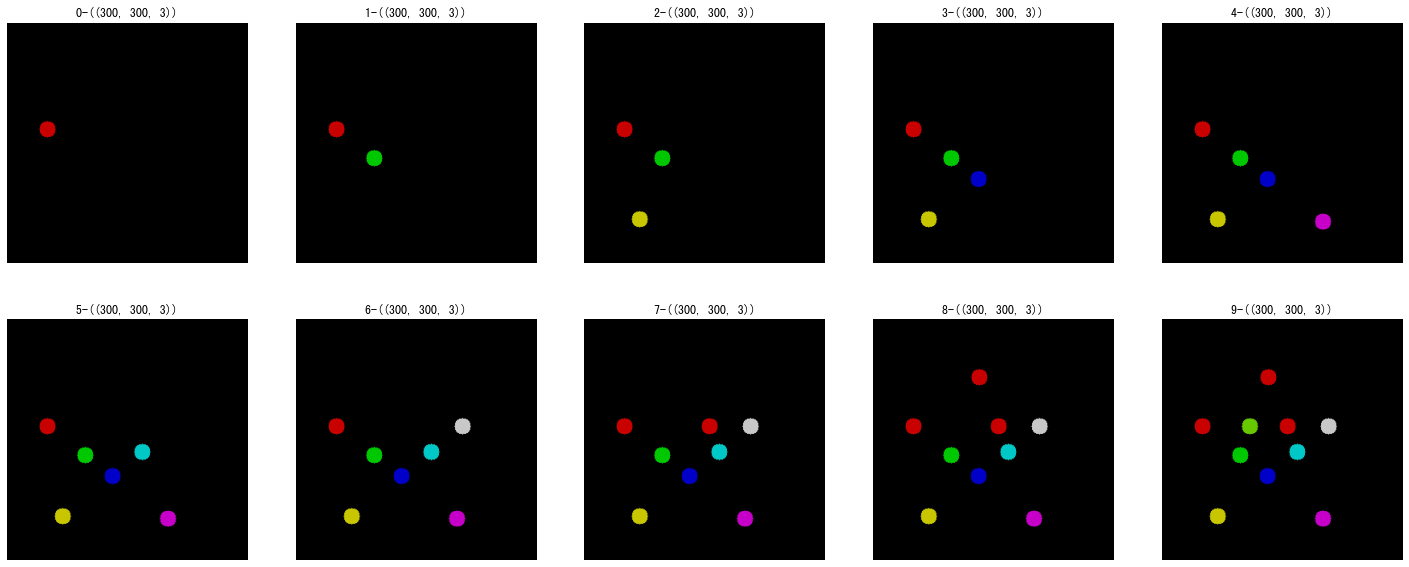

In [29]:
# 依次绘制findContours返回出点 
img=np.zeros((300,300,3),np.uint8)
LABEL_COLORMAP = imgviz.label_colormap(value=200)
imgs=[]
points_colors=[]
for i,point in enumerate(approx_contours):
    x,y=point
    getcolor=tuple(LABEL_COLORMAP[(i+1)%len(LABEL_COLORMAP)].tolist())
    cv2.circle(img,(x,y),10,getcolor,-1)
    points_colors.append(getcolor)
    imgs.append(copy.deepcopy(img))

# 查看图片->逆时针or顺时针
show_images([np.array(points_colors).reshape(1,len(points_colors),3).astype(np.uint8)])
show_images(imgs,2)